## Change parameter bounds and guesses.  Fix a parameter value.
Fits binding of calcium onto EDTA. This will be a bad fit because we constrained the values to the wrong values.

In [1]:
%matplotlib inline
import pytc

# Fit successful? True
# 2017-05-15 12:22:29.439102
# Units: cal/mol
# Fit type: maximum likelihood
# AIC: 38926.688652776924
# AICc: 38928.47588681948
# BIC: 38936.63357300974
# F: 1327.141750005728
# Rsq: 0.9908540574724618
# Rsq_adjusted: 0.9901074499191934
# df: 50
# ln(L): -19458.344326388462
# num_obs: 54
# num_param: 4
type,name,exp_file,value,stdev,bot95,top95,fixed,guess,lower_bound,upper_bound
local,dilution_intercept,ca-edta/tris-01.DH,2.20851e+00,7.57118e-02,2.05636e+00,2.36066e+00,False,0.00000e+00,-inf,inf
local,fx_competent,ca-edta/tris-01.DH,1.00000e+00,inf,-inf,inf,True,1.00000e+00,-inf,inf
local,dH,ca-edta/tris-01.DH,-1.19075e+04,1.15564e+01,-1.19307e+04,-1.18842e+04,False,-4.00000e+03,-inf,inf
local,K,ca-edta/tris-01.DH,1.69719e+07,1.53315e+05,1.66638e+07,1.72799e+07,False,1.00000e+03,1.00000e+00,1.00000e+12
local,dilution_heat,ca-edta/tris-01.DH,-1.25971e+04,5.14373e+02,-1.36308e+04,-1.15635e+04,False,0.00000e+00,-inf,inf



/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


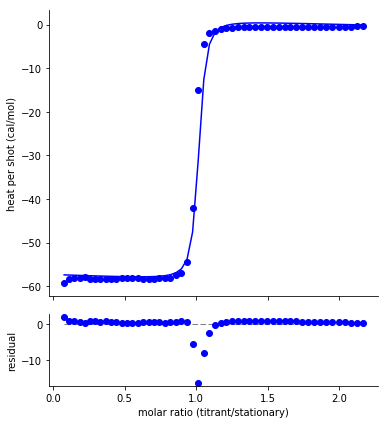

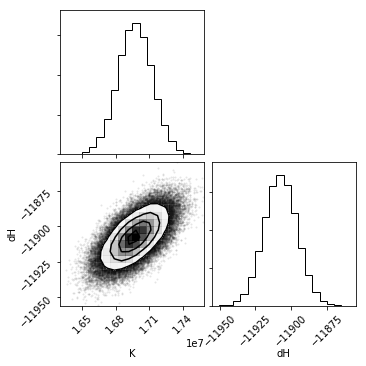

In [2]:
# --------------------------------------------------------------------
# Create a global fitting instance
g = pytc.GlobalFit()

# --------------------------------------------------------------------
# Load in an experimental data set with a single-site binding model
a = pytc.ITCExperiment("ca-edta/tris-01.DH",pytc.indiv_models.SingleSite,shot_start=2)

# Add the experiment to the fitter
g.add_experiment(a)

# Update bounds and guess for "K".  Then fix fx_competent.  
g.update_bounds("K",(1,1e12),a)
g.update_guess("K",1000,a)
g.update_fixed("fx_competent",1.0,a)

# --------------------------------------------------------------------
# Fit the data
g.fit()

# --------------------------------------------------------------------
# Show the results
fig, ax = g.plot()
print(g.fit_as_csv)
c = g.corner_plot()